In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import PIL

### Building AlexNet's Customized Model

In [2]:
num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    
    layers.Conv2D(96, 11, strides=4),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Conv2D(256, 5, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Conv2D(384, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    
    layers.Conv2D(384, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    
    layers.Conv2D(256, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Flatten(),
    
    layers.Dense(9216),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.4),
    
    layers.Dense(4096),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.4),
    
    layers.Dense(4096),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.4),
    
    layers.Dense(num_classes),
    layers.BatchNormalization(),
    layers.Activation('softmax')
])

In [3]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'])

In [4]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/CT_mix/train/',
                                                               image_size=(227, 227),
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/CT_mix/train/',
                                                             image_size=(227, 227),
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             seed=123,
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/CT_mix/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 3388 files belonging to 2 classes.
Using 2711 files for training.
Found 3388 files belonging to 2 classes.
Using 677 files for validation.
Found 542 files belonging to 2 classes.


In [5]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 50,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_ct_mix")

Epoch 1/50
85/85 [==============================] - 32s 376ms/step - loss: 0.8034 - accuracy: 0.5633 - val_loss: 0.8452 - val_accuracy: 0.4978
Epoch 2/50
85/85 [==============================] - 19s 228ms/step - loss: 0.6177 - accuracy: 0.6761 - val_loss: 0.8896 - val_accuracy: 0.4978
Epoch 3/50
85/85 [==============================] - 19s 226ms/step - loss: 0.5822 - accuracy: 0.7008 - val_loss: 0.7631 - val_accuracy: 0.5111
Epoch 4/50
85/85 [==============================] - 19s 226ms/step - loss: 0.5397 - accuracy: 0.7374 - val_loss: 0.6215 - val_accuracy: 0.6632
Epoch 5/50
85/85 [==============================] - 19s 229ms/step - loss: 0.5167 - accuracy: 0.7554 - val_loss: 0.5267 - val_accuracy: 0.7474
Epoch 6/50
85/85 [==============================] - 19s 226ms/step - loss: 0.4794 - accuracy: 0.7743 - val_loss: 0.4581 - val_accuracy: 0.8139
Epoch 7/50
85/85 [==============================] - 19s 226ms/step - loss: 0.4491 - accuracy: 0.8034 - val_loss: 0.4184 - val_accuracy: 0.8419

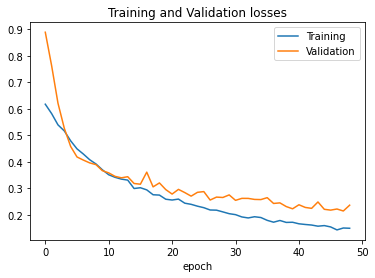

In [6]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_ct_mix.png")

In [7]:
model.evaluate(test_ds)

17/17 [==============================] - 3s 170ms/step - loss: 0.2830 - accuracy: 0.8967


[0.2829737067222595, 0.8966789841651917]